\begin{equation}
m_{obs}=2.5log_{10}(\frac{f_0}{f_{obs}})
\end{equation}

\begin{equation}
\begin{split}
\sigma_m&=\frac{dm_{obs}}{f_{obs}}\sigma_{obs}\\
&=\frac{2.5}{f_0log10}\sigma_{obs}
\end{split}
\end{equation}



In [1]:
%pylab inline
import scipy.stats as stats
import astropy.stats as astats
import numpy.random as random

Populating the interactive namespace from numpy and matplotlib


In [2]:
def cal_means(hboot):
    return (np.mean(hboot,axis=1))

In [3]:
def cal_set_errplus(hboot):
    means=cal_means(hboot)
    return np.percentile(means,[97.5])-np.mean(cal_means(hboot))

In [4]:
def cal_set_errminus(hboot):
    means=cal_means(hboot)
    return np.mean(cal_means(hboot))-np.percentile(means,[2.5])

In [100]:
def set_bootstrap(f0,sigma_f,ndata,nbootstraps,nset,ax1,ax2):
    
    set_mean_f=[0 for i in range(nset)]
    set_errplus_f=[0 for i in range(nset)]
    set_errminus_f=[0 for i in range(nset)]
   
    set_mean_m=[0 for i in range(nset)]
    set_errplus_m=[0 for i in range(nset)]
    set_errminus_m=[0 for i in range(nset)]
    
    sample_mean_f=[0 for i in range(nset)]
    sample_mean_m=[0 for i in range(nset)]
    
    for i in range(nset):
        hdata_f=random.randn(ndata)*sigma_f+f0
        hdata_m=2.5*np.log10(f0/hdata_f)
        sample_mean_f[i]=np.mean(hdata_f)
        sample_mean_m[i]=np.mean(hdata_m)
        bootidx=np.floor((random.rand(nbootstraps,ndata)*ndata))
        bootidx=bootidx.astype(int)
        hboot_f=hdata_f[bootidx]
        hboot_m=hdata_m[bootidx]
        
        set_mean_f[i]=np.mean(cal_means(hboot_f))
        set_errplus_f[i]=float(cal_set_errplus(hboot_f))
        set_errminus_f[i]=float(cal_set_errminus(hboot_f))
        
        set_mean_m[i]=np.mean(cal_means(hboot_m))
        set_errplus_m[i]=float(cal_set_errplus(hboot_m))
        set_errminus_m[i]=float(cal_set_errminus(hboot_m))

    set_number=[i for i in range(nset)]
    
    
    ax1.set_title('f_obs, sigma_f={}'.format(sigma_f))
    ax1.set_xlabel('set number')
    ax1.set_ylabel('f_obs')
    ax1.errorbar(set_number,set_mean_f,yerr=[set_errplus_f,set_errminus_f],\
                 fmt='.',ecolor='r',capsize=5)
    ax1.errorbar(set_number,sample_mean_f,yerr=sigma_f/(np.sqrt(12))*2,fmt='.',ecolor='g',capsize=5)
    
    
    
    
    ax2.set_xlabel('set number')
    ax2.set_ylabel('m_obs')
    ax2.set_title('m_obs, sigma_f={}'.format(sigma_f))
    ax2.errorbar(set_number,set_mean_m,yerr=[set_errplus_m,set_errminus_m],\
                 fmt='.',ecolor='r',capsize=5)
    ax2.errorbar(set_number,sample_mean_m,yerr=(2.5/(f0*np.log(10)))*sigma_f/np.sqrt(12)*2,fmt='.',ecolor='g',capsize=5)
    

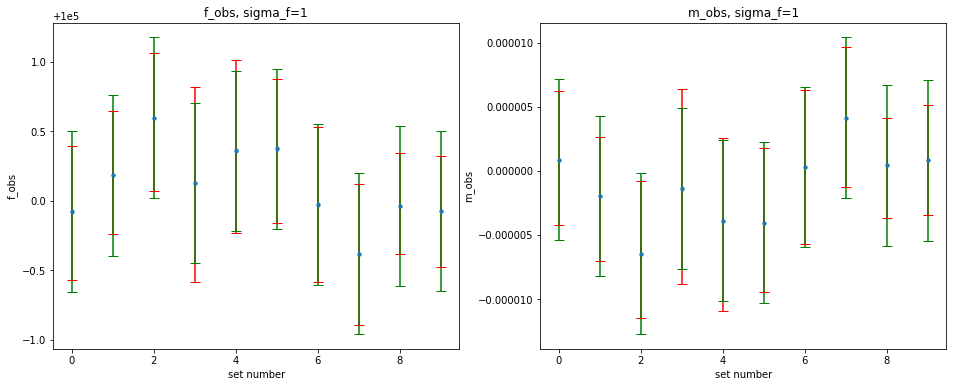

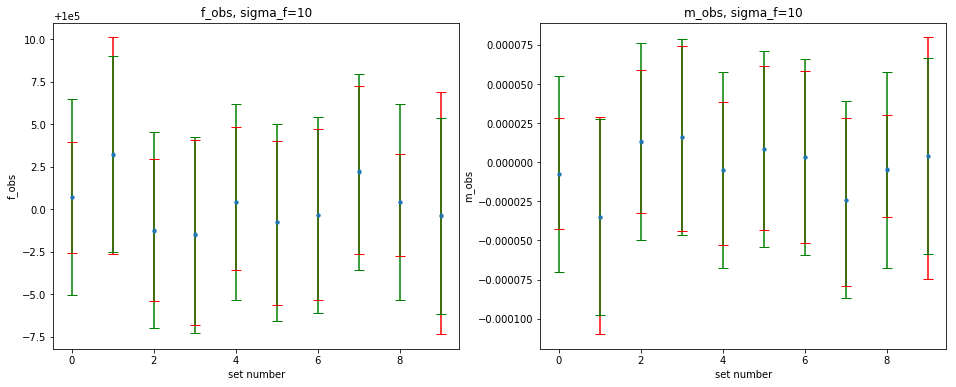

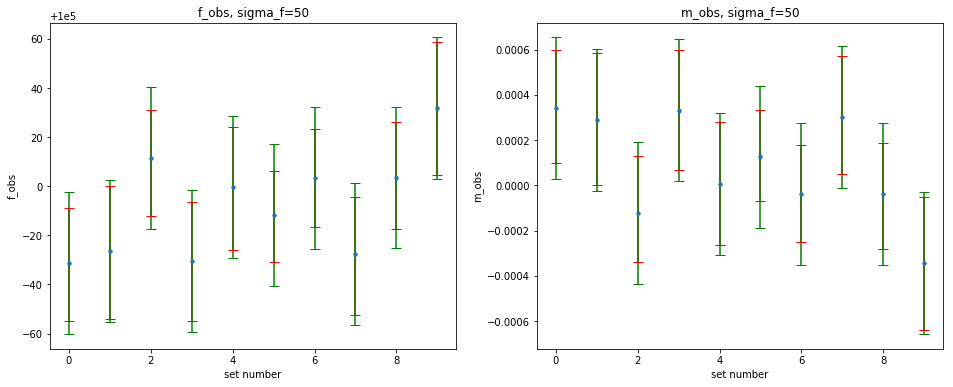

In [101]:
f0=int(1E3)
ndata=12
nbootstraps=int(1E4)
nset=10
f0=int(10E4)
sigma=[1,10,50]
#sigma=[1]

for i, sigma_f in enumerate(sigma):
    plt.figure(figsize=(16,6))
    
    ax1=plt.subplot(1,2,1)
    ax2=plt.subplot(1,2,2)
    set_bootstrap(f0,sigma_f,ndata,nbootstraps,nset,ax1,ax2)
    

The 3 figures on the left side are for $f_{obs}$. The red errorbars are for bootstrap confidence interval of $f_{obs}$ and the green errorbars are for true $\sigma{f}$. The bootstrap understates errors. The 3 figures on the right side are for $m_{obs}$. The red errorbars are for bootstrap confidence interval of $m_{obs}$ and the green errorbars are for true $\sigma{m}$ calculated by the error propagation. The $\sigma{m}$ is a little larger than the true $\sigma{m}$. Generally the error propagation works well. 